## Objective: Predict the house price of a given house based on specific features.

#### Import modules and prepare dataset.

In [1]:
# Import sklearn modules.
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from random import choice

# Import other modules.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from IPython.display import display

dataset = load_boston()    # Predicting boston house prices.

data = dataset.data
target = dataset.target

print(data.shape)
print(target.shape)

# Check for zeros in data.
print(np.sum(data == 0)/data.size)    # -> 13% (zeros)
print(np.sum(data != 0)/data.size)    # -> 87% (non zeros)

# Check for NaN values in data.
print(np.isnan(np.sum(data)))    # -> False

X_train, X_test, y_train, y_test = train_test_split(data, target)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

(506, 13)
(506,)
0.12815445424141075
0.8718455457585892
False
X_train.shape: (379, 13)
y_train.shape: (379,)
X_test.shape: (127, 13)
y_test.shape: (127,)


#### Visualize the data

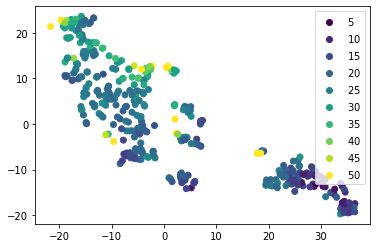

In [2]:
tsne = TSNE()

X_train_trans = tsne.fit_transform(X_train)

scatter = plt.scatter(X_train_trans[:, 0], X_train_trans[:, 1], c=y_train)
plt.legend(*scatter.legend_elements())

#### Use linear model on the data.

In [3]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

lin_pred_train = linreg.predict(X_train)
lin_pred_test = linreg.predict(X_test)

print(f'Train MSE: {mean_squared_error(y_train, lin_pred_train)}')
print(f'Test MSE: {mean_squared_error(y_test, lin_pred_test)}')
print(f'Train Score: {linreg.score(X_train, y_train)}')
print(f'Test Score: {linreg.score(X_test, y_test)}')

Train MSE: 19.668321038983663
Test MSE: 29.279814763513944
Train Score: 0.7644855844453923
Test Score: 0.6615719381756955


#### View the results of the algorithm

In [5]:
sample_target = choice(y_test)
sample_index = np.where(y_test == sample_target)

sample_pred = np.mean(linreg.predict(X_test[sample_index]))

print(f'Predicted Price: {sample_pred:.1f}')
print(f'Target Price: {sample_target}')


Predicted Price: 18.6
Target Price: 16.1


#### Plot the results

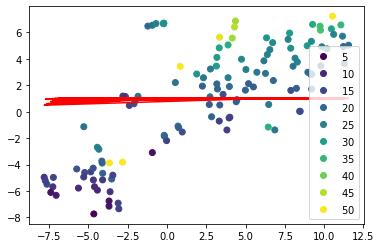

In [13]:
X_test_trans = tsne.fit_transform(X_test)

m = sorted(linreg.coef_, reverse=True)[:2]    # Getting the two most important coefficients.
b = linreg.intercept_
loss = expit(X_test_trans * m + b)
scatter = plt.scatter(X_test_trans[:, 0], X_test_trans[:, 1], c=y_test)
plt.plot(X_test_trans, loss, c='red')
plt.legend(*scatter.legend_elements())